From https://github.com/warmspringwinds/tf-image-segmentation

In [1]:
%matplotlib inline
import os
import sys
import tensorflow as tf
import skimage.io as io
import numpy as np

# sys.path.append("tf-image-segmentation/")
sys.path.append('/home/arka_s/internship_files/image_segmentation/tf-image-segmentation/')
# sys.path.append("/home/dpakhom1/workspace/my_models/slim/")
sys.path.append('/home/arka_s/internship_files/image_segmentation/models/slim/')

# fcn_16s_checkpoint_path = \
#  '/home/dpakhom1/tf_projects/segmentation/model_fcn8s_final.ckpt'

fcn_16s_checkpoint_path = '/home/arka_s/internship_files/image_segmentation/fcn_8s_checkpoint/model_fcn8s_final.ckpt'


os.environ["CUDA_VISIBLE_DEVICES"] = '1'

slim = tf.contrib.slim

from tf_image_segmentation.models.fcn_8s import FCN_8s
from tf_image_segmentation.utils.inference import adapt_network_for_any_size_input
from tf_image_segmentation.utils.pascal_voc import pascal_segmentation_lut

number_of_classes = 21

In [2]:
# image_filename = 'me.jpg'
# image_filename = '../../data/nimble17_data/cluster_folder/0/1657074819a8525b50a1c375716d252f.png'
#image_filename = 'small_cat.jpg'
# image_filename = '../../data/protest_data/cropped/direct_cropped/beach_mdf_cropped_019.jpg'
image_filename = '../../data/protest_data/only_text/beach_mdf_019/0.png'

image_filename_placeholder = tf.placeholder(tf.string)

feed_dict_to_use = {image_filename_placeholder: image_filename}

image_tensor = tf.read_file(image_filename_placeholder)
if image_filename[-4:] == '.jpg':
    image_tensor = tf.image.decode_jpeg(image_tensor, channels=3)
elif image_filename[-4:] == '.png':
    image_tensor = tf.image.decode_png(image_tensor, channels=3)

# Fake batch for image and annotation by adding
# leading empty axis.
image_batch_tensor = tf.expand_dims(image_tensor, axis=0)

# Be careful: after adaptation, network returns final labels
# and not logits
FCN_8s = adapt_network_for_any_size_input(FCN_8s, 32)


pred, fcn_16s_variables_mapping = FCN_8s(image_batch_tensor=image_batch_tensor,
                                          number_of_classes=number_of_classes,
                                          is_training=False)

# The op for initializing the variables.
initializer = tf.local_variables_initializer()

saver = tf.train.Saver()

In [3]:
# with tf.Session() as sess:
sess = tf.Session()
sess.run(initializer)

#     saver.restore(sess,
#      "/home/dpakhom1/tf_projects/segmentation/model_fcn8s_final.ckpt")
saver.restore(sess, 
                 '/home/arka_s/internship_files/image_segmentation/fcn_8s_checkpoint/model_fcn8s_final.ckpt')
#     image_np, pred_np = sess.run([image_tensor, pred], feed_dict=feed_dict_to_use)
    
#     io.imshow(image_np)
#     io.show()
    
#     io.imshow(pred_np.squeeze())
#     io.show()

INFO:tensorflow:Restoring parameters from /home/arka_s/internship_files/image_segmentation/fcn_8s_checkpoint/model_fcn8s_final.ckpt


In [4]:
image_np, pred_np = sess.run([image_tensor, pred], feed_dict=feed_dict_to_use)

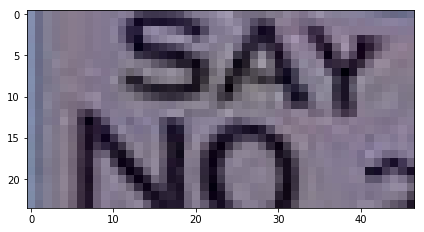

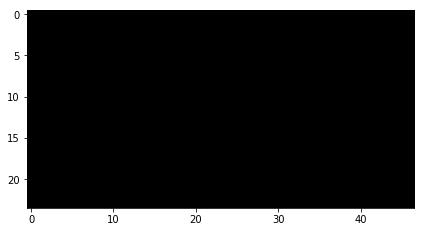

In [5]:
io.imshow(image_np)
io.show()

io.imshow(pred_np.squeeze())
io.show()

In [ ]:
with tf.Session() as sess:
    
    sess.run(initializer)

    saver.restore(sess, 
                 '/home/arka_s/internship_files/image_segmentation/fcn_8s_checkpoint/model_fcn8s_final.ckpt')
    image_np, pred_np = sess.run([image_tensor, pred], feed_dict=feed_dict_to_use)
    
    io.imshow(image_np)
    io.show()
    
    io.imshow(pred_np.squeeze())
    io.show()

In [ ]:
%matplotlib
from __future__ import division
import os
import sys
import tensorflow as tf
import skimage.io as io
import numpy as np

In [ ]:
sys.path.append('/home/arka_s/internship_files/image_segmentation/tf-image-segmentation/')
sys.path.append('/home/arka_s/internship_files/image_segmentation/models/slim/')

In [ ]:
fcn_8s_checkpoint_path = '/home/arka_s/internship_files/image_segmentation/fcn_8s_checkpoint/model_fcn8s_final.ckpt'

In [ ]:
os.environ["CUDA_VISIBLE_DEVICES"] = '1'

In [ ]:
slim = tf.contrib.slim

In [ ]:
from tf_image_segmentation.models.fcn_8s import FCN_8s
from tf_image_segmentation.utils.inference import adapt_network_for_any_size_input
from tf_image_segmentation.utils.pascal_voc import pascal_segmentation_lut

In [ ]:
number_of_classes = 21
img_fname = '../../data/nimble17_data/cluster_folder/0/1657074819a8525b50a1c375716d252f.png'
img_fname_placeholder = tf.placeholder(tf.string)
feed_dict_to_use = {img_fname_placeholder : img_fname}
img_tensor = tf.read_file(img_fname_placeholder)
img_tensor = tf.image.decode_png(img_tensor, channels=3)

In [ ]:
# Fake batch for image and annotation by adding
# leading empty axis.
img_batch_tensor = tf.expand_dims(img_tensor, axis=0)

# Be careful: after adaptation, network returns final labels
# and not logits
FCN_8s = adapt_network_for_any_size_input(FCN_8s, 32)
pred, fcn_16s_variables_mapping = FCN_8s(image_batch_tensor=img_batch_tensor,
                                          number_of_classes=number_of_classes,
                                          is_training=False)

In [ ]:
initializer = tf.local_variables_initializer()

saver = tf.train.Saver()

with tf.Session() as sess:
    
    sess.run(initializer)

    saver.restore(sess,'/home/arka_s/internship_files/image_segmentation/fcn_8s_checkpoint/model_fcn8s_final.ckpt.data-00000-of-00001')
    
    image_np, pred_np = sess.run([image_tensor, pred], feed_dict=feed_dict_to_use)
    
    io.imshow(image_np)
    io.show()
    
    io.imshow(pred_np.squeeze())
    io.show()